# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from pycirclize import Circos
from pycirclize.parser import Matrix

import networkx as nx

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import fixedDensity as fd
import chordPlot as cp

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Covariance Matrices

In [4]:
# cov_NeuN_dict
with open(os.path.join(layer_CalData, 'cov_NeuN_dict.pkl'), 'rb') as f:
    cov_NeuN_dict = pickle.load(f)
f.close()

# cov_NeuN_dict_w
with open(os.path.join(layer_CalData, 'cov_NeuN_dict_w.pkl'), 'rb') as f:
    cov_NeuN_dict_w = pickle.load(f)
f.close()

## Loading Log %AO Values

In [5]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'rb') as f:
    NeuN_HC = pickle.load(f)
f.close()

# NeuN_TAU
with open(os.path.join(layer_dataDir, 'NeuN_TAU.pkl'), 'rb') as f:
    NeuN_TAU = pickle.load(f)
f.close()

# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'rb') as f:
    NeuN_TDP = pickle.load(f)
f.close()

# SMI32_HC
with open(os.path.join(layer_dataDir, 'SMI32_HC.pkl'), 'rb') as f:
    SMI32_HC = pickle.load(f)
f.close()

# SMI32_TAU
with open(os.path.join(layer_dataDir, 'SMI32_TAU.pkl'), 'rb') as f:
    SMI32_TAU = pickle.load(f)
f.close()

# SMI32_TDP
with open(os.path.join(layer_dataDir, 'SMI32_TDP.pkl'), 'rb') as f:
    SMI32_TDP = pickle.load(f)
f.close()

## Loading Layer Neuron Labels (NeuN)

In [6]:
NeuN_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3d(Paracingulate)', 'L23_3v(Paracingulate)', 'L23_4(Rectus)', 'L23_5(Middle Frontal)', 
               'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3d(Paracingulate)', 'L56_3v(Paracingulate)', 'L56_4(Rectus)', 'L56_5(Middle Frontal)']

# Draw Graph Networks (NeuN)

## Define Variables

### Set fixed density value 

In [7]:
fd_val = 10

### Label Order

In [8]:
order = ['L23_5(Middle Frontal)',
         'L23_4(Rectus)',
         'L23_3v(Paracingulate)', 
         'L23_3d(Paracingulate)',
         'L23_2(Cingulate)',
         'L23_1(Cingulate)',
         'L56_1(Cingulate)',
         'L56_2(Cingulate)',
         'L56_3d(Paracingulate)',
         'L56_3v(Paracingulate)', 
         'L56_4(Rectus)',
         'L56_5(Middle Frontal)']

### Dataset to Use

In [9]:
# Variable setting
neuron_type = "NeuN"
val_type = 'Original'
cov_dict = cov_NeuN_dict
data_label = NeuN_Labels

In [10]:
# Set Node Sizes based on Log %AO values
HC_exp = NeuN_HC.copy()
TAU_exp = NeuN_TAU.copy()
TDP_exp = NeuN_TDP.copy()

# Get min/max %AO of LBD
minVal = np.nanmin(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())))
maxVal = np.nanmax(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())) - minVal + 0.0015, axis=0)

scale = 700

# Apply a transformation to create a more dramatic difference in node sizes
def transform_values(values, min_val, max_val, scale):
    # Normalize the values
    normalized = (values - min_val) / max_val
    # Apply an exponential transformation
    transformed = np.exp(normalized) - 1  # subtracting 1 to bring the minimum back to 0
    # Scale the transformed values
    return scale * transformed

# Size of Nodes
markerVecHC = np.nanmean(HC_exp, axis=0)
markerVecHC = transform_values(markerVecHC, minVal, maxVal, scale)

markerVecTAU = np.nanmean(TAU_exp, axis=0)
markerVecTAU = transform_values(markerVecTAU, minVal, maxVal, scale)

markerVecTDP = np.nanmean(TDP_exp, axis=0)
markerVecTDP = transform_values(markerVecTDP, minVal, maxVal, scale)

## HC > TAU

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

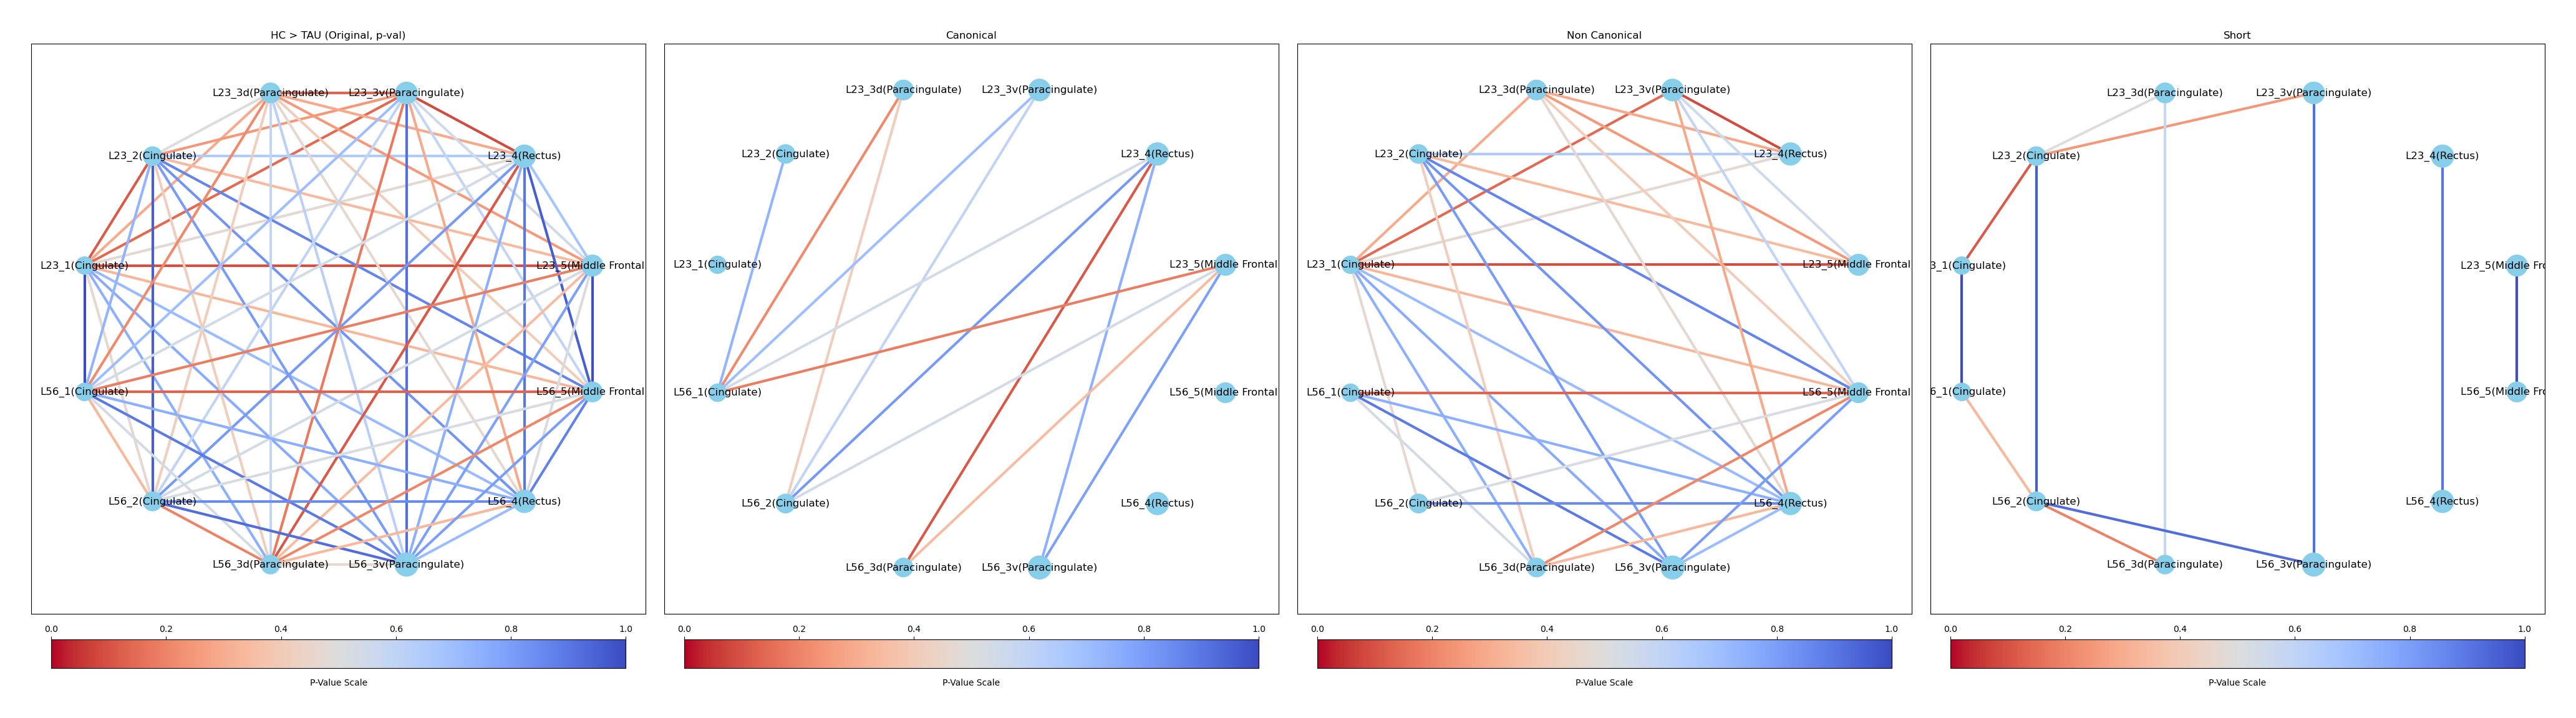

In [11]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, f'HC > TAU ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TAU ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()



## TAU > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

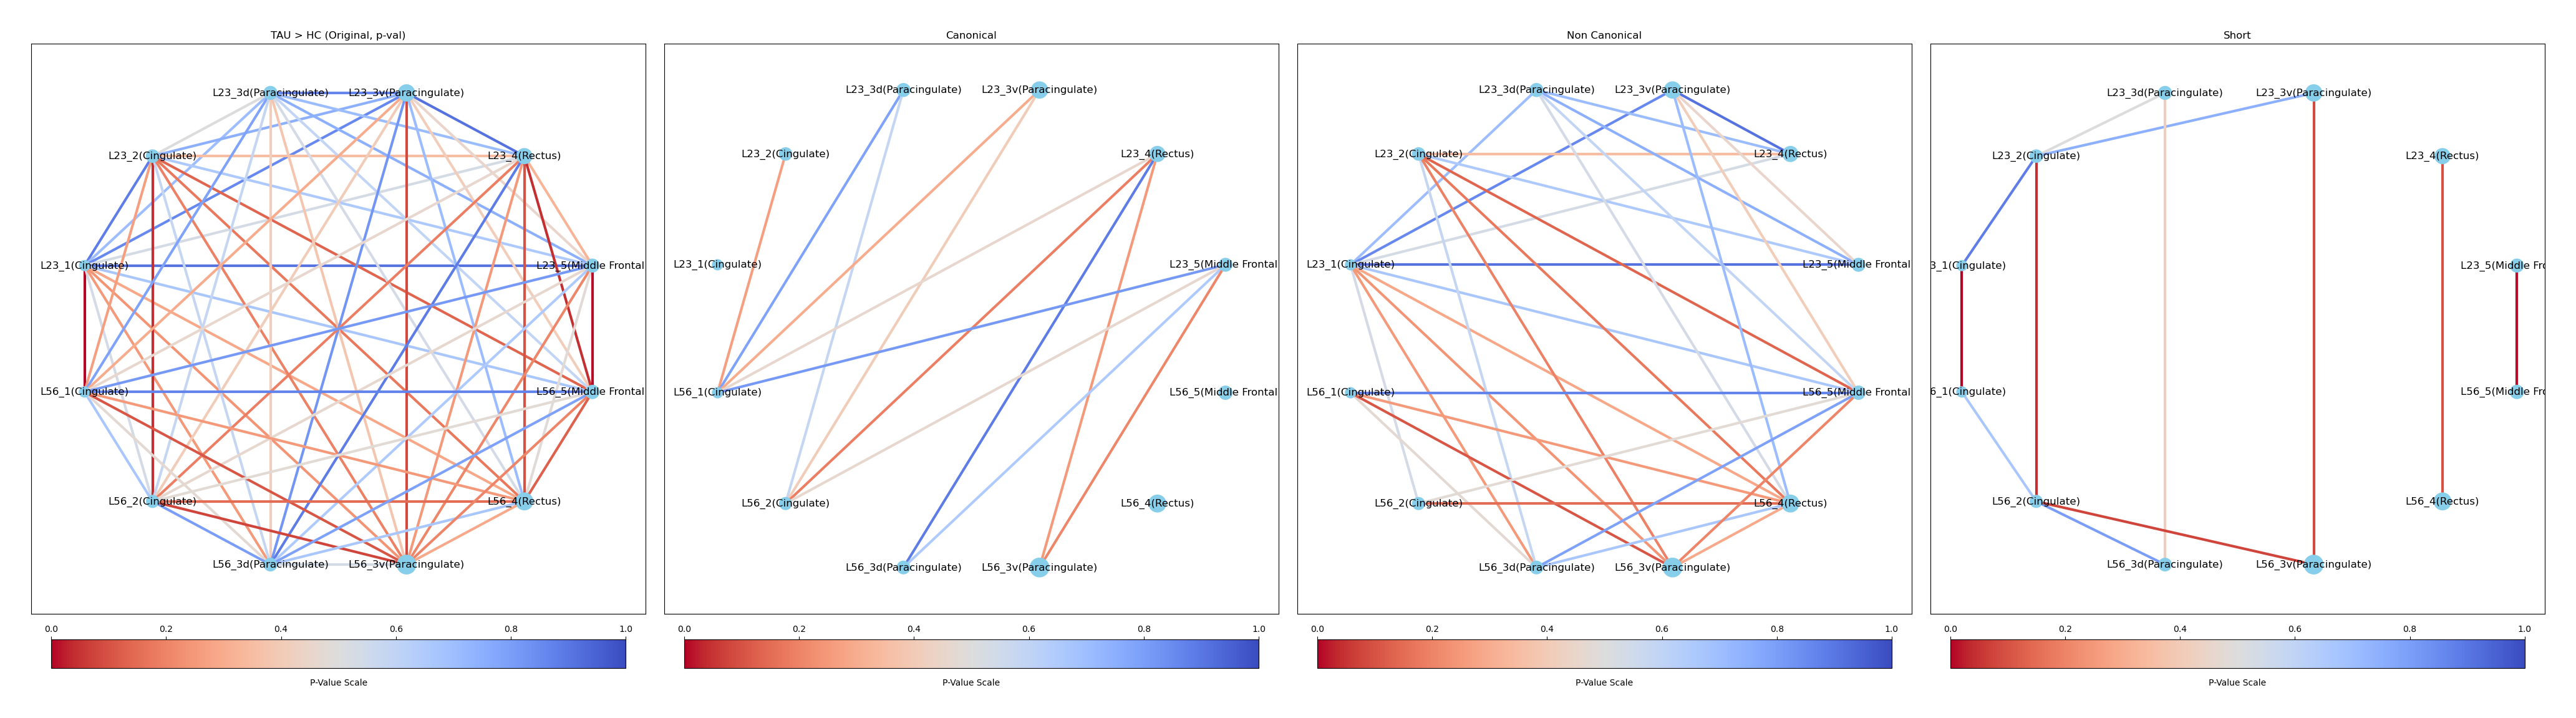

In [12]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, f'TAU > HC ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > HC ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## HC > TDP

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

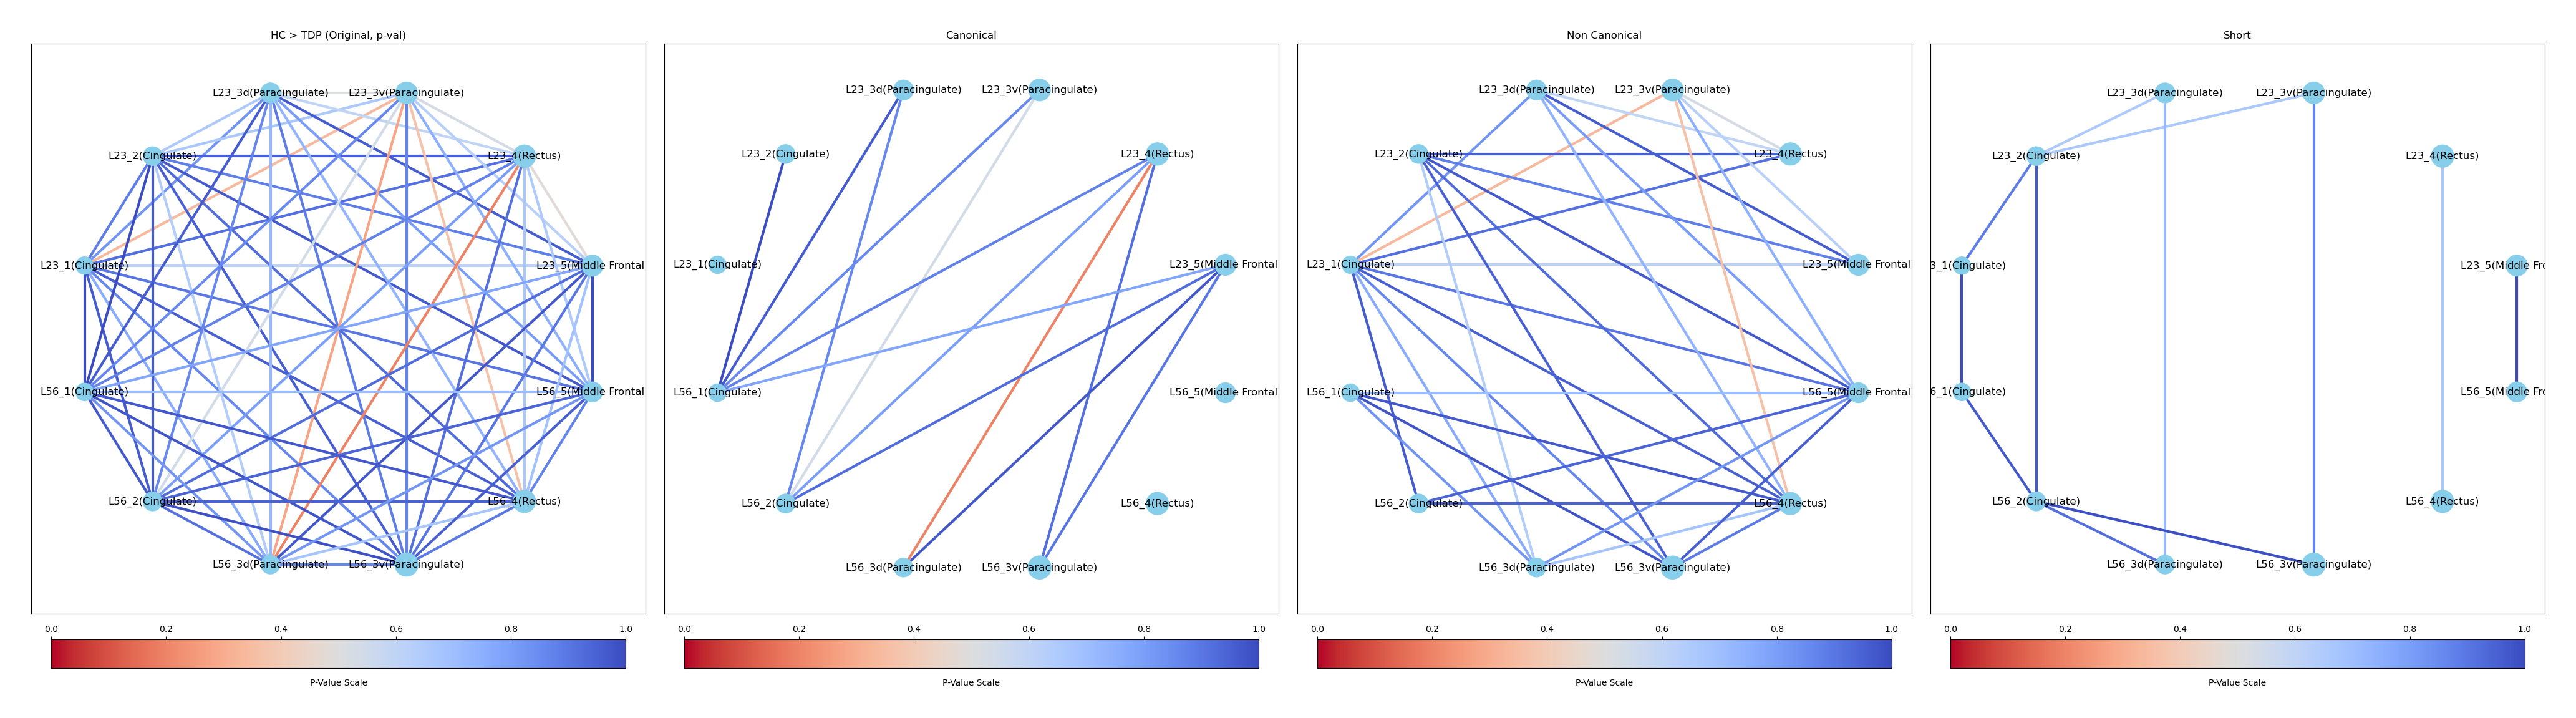

In [13]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, f'HC > TDP ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TDP ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

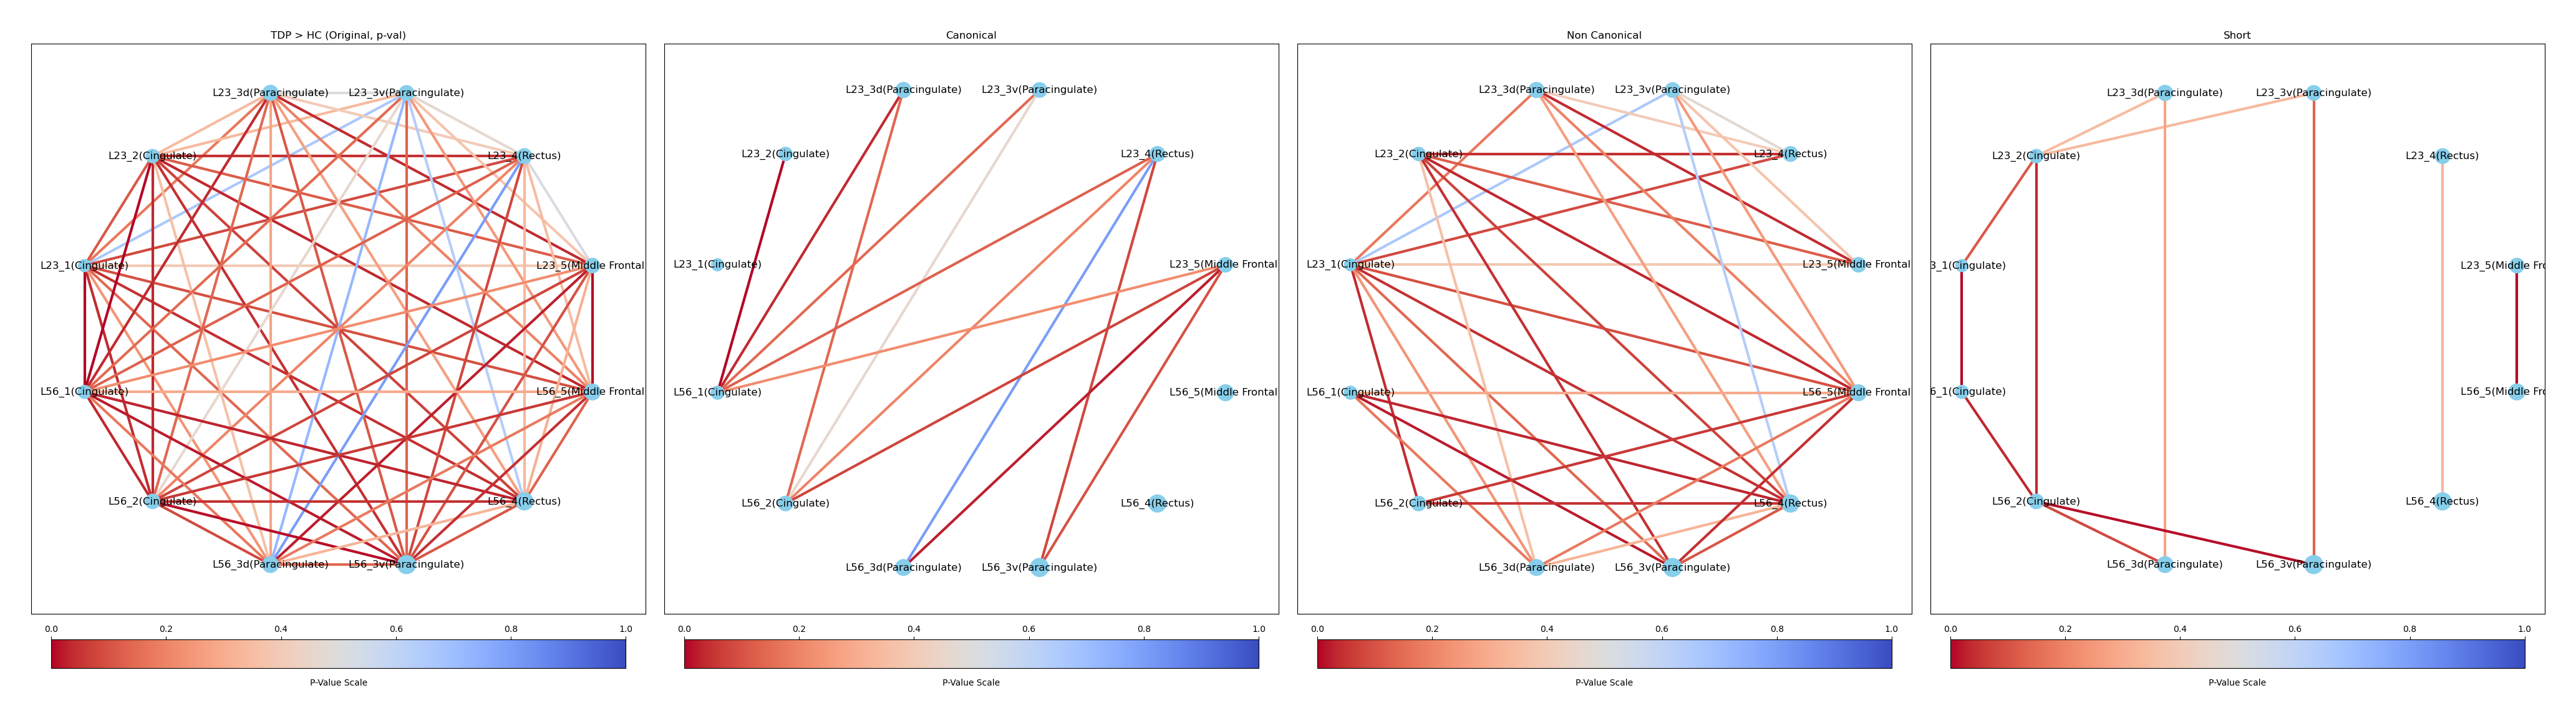

In [14]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, f'TDP > HC ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > HC ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TAU > TDP

In [15]:
pd.DataFrame(cov_dict['TAU_gt_TDP_raw'])

0         1         2         3         4         5         6   \
0        NaN  0.993697  0.938451  0.770298  0.929122  0.973757  0.652357   
1   0.993697       NaN  0.650165  0.857465  0.888875  0.965137  0.988449   
2   0.938451  0.650165       NaN  0.886633  0.806678  0.998943  0.995955   
3   0.770298  0.857465  0.886633       NaN  0.924474  0.567865  0.667764   
4   0.929122  0.888875  0.806678  0.924474       NaN  0.268526  0.845634   
5   0.973757  0.965137  0.998943  0.567865  0.268526       NaN  0.972841   
6   0.652357  0.988449  0.995955  0.667764  0.845634  0.972841       NaN   
7   0.965323  0.446542  0.902454  0.434475  0.425130  0.927329  0.987206   
8   0.492593  0.717339  0.635727  0.665299  0.681125  0.998337  0.801406   
9   0.594817  0.710890  0.815090  0.310812  0.678177  0.614056  0.710526   
10  0.857130  0.640303  0.769509  0.610115  0.157393  0.692458  0.871755   
11  0.976279  0.751934  0.915394  0.650667  0.050080  0.819129  0.975922   

          7         8         9         10        11  
0   0.965323  0.492593  0.594817  0.857130  0.976279  
1   0.446542  0.717339  0.710890  0.640303  0.751934  
2   0.902454  0.635727  0.815090  0.769509  0.915394  
3   0.434475  0.665299  0.310812  0.610115  0.650667  
4   0.425130  0.681125  0.678177  0.157393  0.050080  
5   0.927329  0.998337  0.614056  0.692458  0.819129  
6   0.987206  0.801406  0.710526  0.871755  0.975922  
7        NaN  0.989046  0.699143  0.669686  0.951895  
8   0.989046       NaN  0.881816  0.827727  0.985765  
9   0.699143  0.881816       NaN  0.680319  0.749546  
10  0.669686  0.827727  0.680319       NaN  0.437032  
11  0.951895  0.985765  0.749546  0.437032       NaN

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

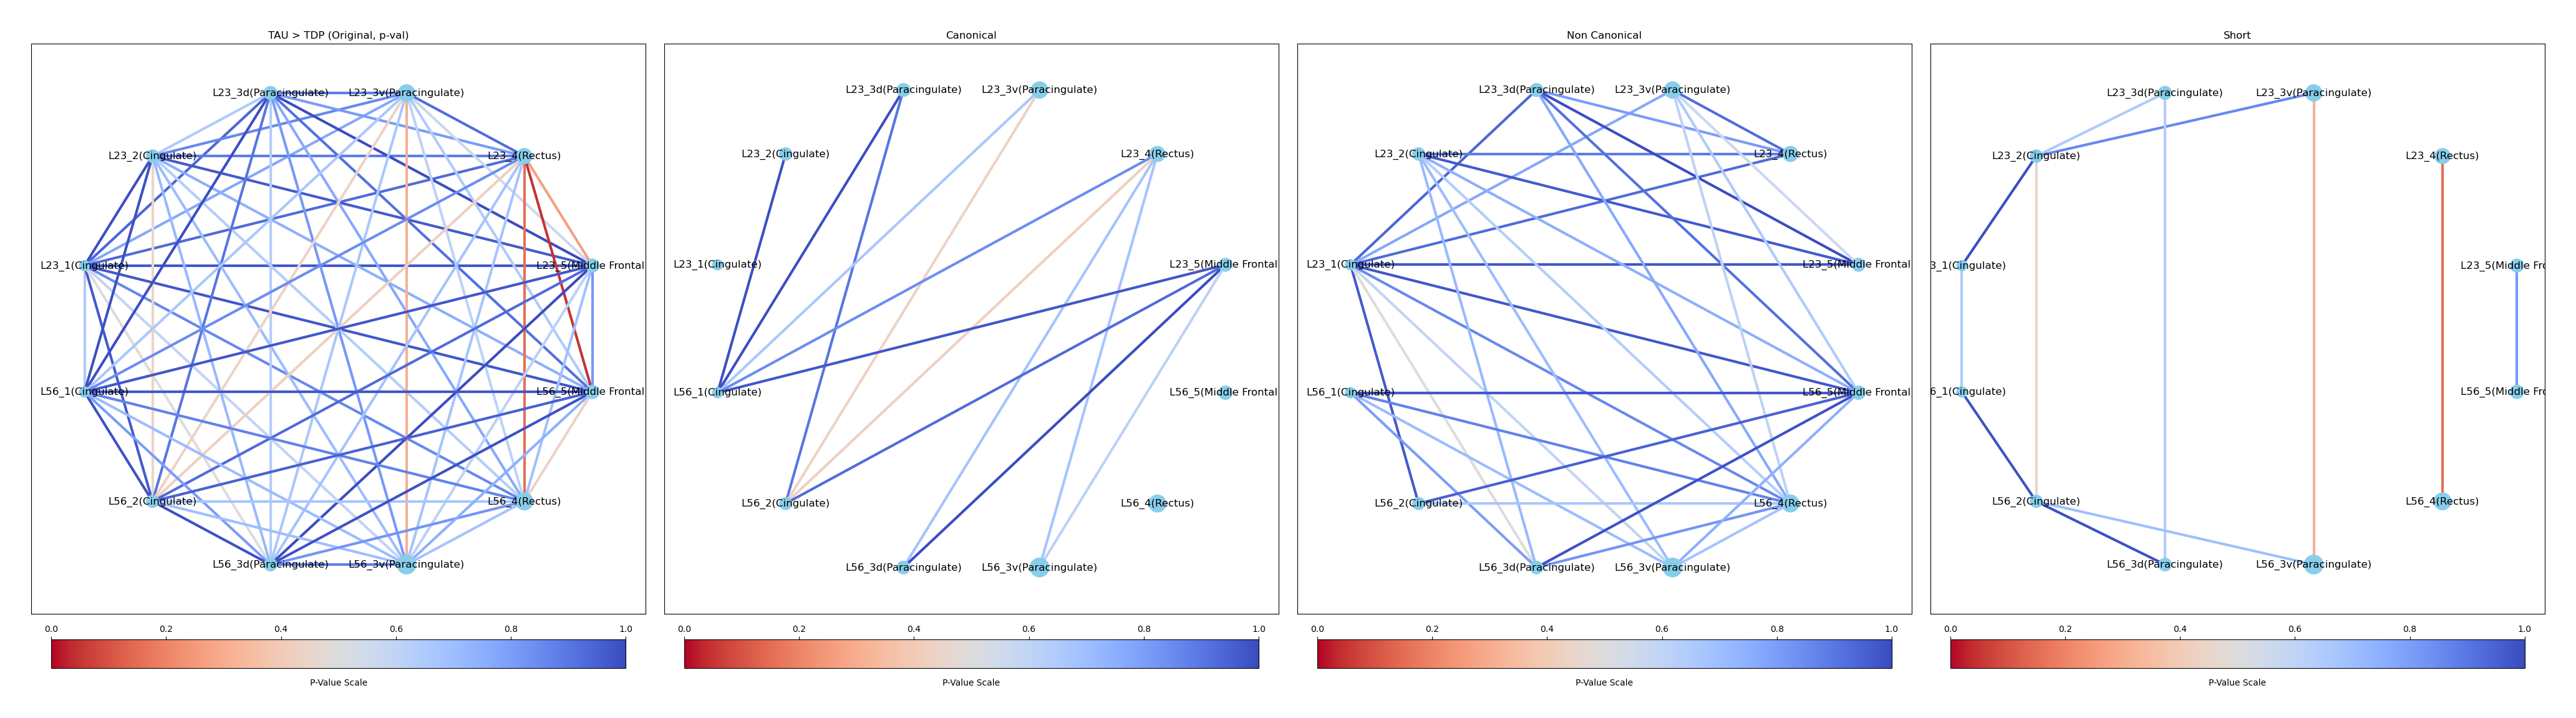

In [16]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, f'TAU > TDP ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > TDP ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > TAU

In [17]:
pd.DataFrame(cov_dict['TDP_gt_TAU_raw'], index=data_label, columns=data_label)

L23_1(Cingulate)  L23_2(Cingulate)  \
L23_1(Cingulate)                    NaN          0.006303   
L23_2(Cingulate)               0.006303               NaN   
L23_3d(Paracingulate)          0.061549          0.349835   
L23_3v(Paracingulate)          0.229702          0.142535   
L23_4(Rectus)                  0.070878          0.111125   
L23_5(Middle Frontal)          0.026243          0.034863   
L56_1(Cingulate)               0.347643          0.011551   
L56_2(Cingulate)               0.034677          0.553458   
L56_3d(Paracingulate)          0.507407          0.282661   
L56_3v(Paracingulate)          0.405183          0.289110   
L56_4(Rectus)                  0.142870          0.359697   
L56_5(Middle Frontal)          0.023721          0.248066   

                       L23_3d(Paracingulate)  L23_3v(Paracingulate)  \
L23_1(Cingulate)                    0.061549               0.229702   
L23_2(Cingulate)                    0.349835               0.142535   
L23_3d(Paracingulate)                    NaN               0.113367   
L23_3v(Paracingulate)               0.113367                    NaN   
L23_4(Rectus)                       0.193322               0.075526   
L23_5(Middle Frontal)               0.001057               0.432135   
L56_1(Cingulate)                    0.004045               0.332236   
L56_2(Cingulate)                    0.097546               0.565525   
L56_3d(Paracingulate)               0.364273               0.334701   
L56_3v(Paracingulate)               0.184910               0.689188   
L56_4(Rectus)                       0.230491               0.389885   
L56_5(Middle Frontal)               0.084606               0.349333   

                       L23_4(Rectus)  L23_5(Middle Frontal)  L56_1(Cingulate)  \
L23_1(Cingulate)            0.070878               0.026243          0.347643   
L23_2(Cingulate)            0.111125               0.034863          0.011551   
L23_3d(Paracingulate)       0.193322               0.001057          0.004045   
L23_3v(Paracingulate)       0.075526               0.432135          0.332236   
L23_4(Rectus)                    NaN               0.731474          0.154366   
L23_5(Middle Frontal)       0.731474                    NaN          0.027159   
L56_1(Cingulate)            0.154366               0.027159               NaN   
L56_2(Cingulate)            0.574870               0.072671          0.012794   
L56_3d(Paracingulate)       0.318875               0.001663          0.198594   
L56_3v(Paracingulate)       0.321823               0.385944          0.289474   
L56_4(Rectus)               0.842607               0.307542          0.128245   
L56_5(Middle Frontal)       0.949920               0.180871          0.024078   

                       L56_2(Cingulate)  L56_3d(Paracingulate)  \
L23_1(Cingulate)               0.034677               0.507407   
L23_2(Cingulate)               0.553458               0.282661   
L23_3d(Paracingulate)          0.097546               0.364273   
L23_3v(Paracingulate)          0.565525               0.334701   
L23_4(Rectus)                  0.574870               0.318875   
L23_5(Middle Frontal)          0.072671               0.001663   
L56_1(Cingulate)               0.012794               0.198594   
L56_2(Cingulate)                    NaN               0.010954   
L56_3d(Paracingulate)          0.010954                    NaN   
L56_3v(Paracingulate)          0.300857               0.118184   
L56_4(Rectus)                  0.330314               0.172273   
L56_5(Middle Frontal)          0.048105               0.014235   

                       L56_3v(Paracingulate)  L56_4(Rectus)  \
L23_1(Cingulate)                    0.405183       0.142870   
L23_2(Cingulate)                    0.289110       0.359697   
L23_3d(Paracingulate)               0.184910       0.230491   
L23_3v(Paracingulate)               0.689188       0.389885   
L23_4(Rectus)                       0.321823       0.842607   
L23_5(Middle F

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

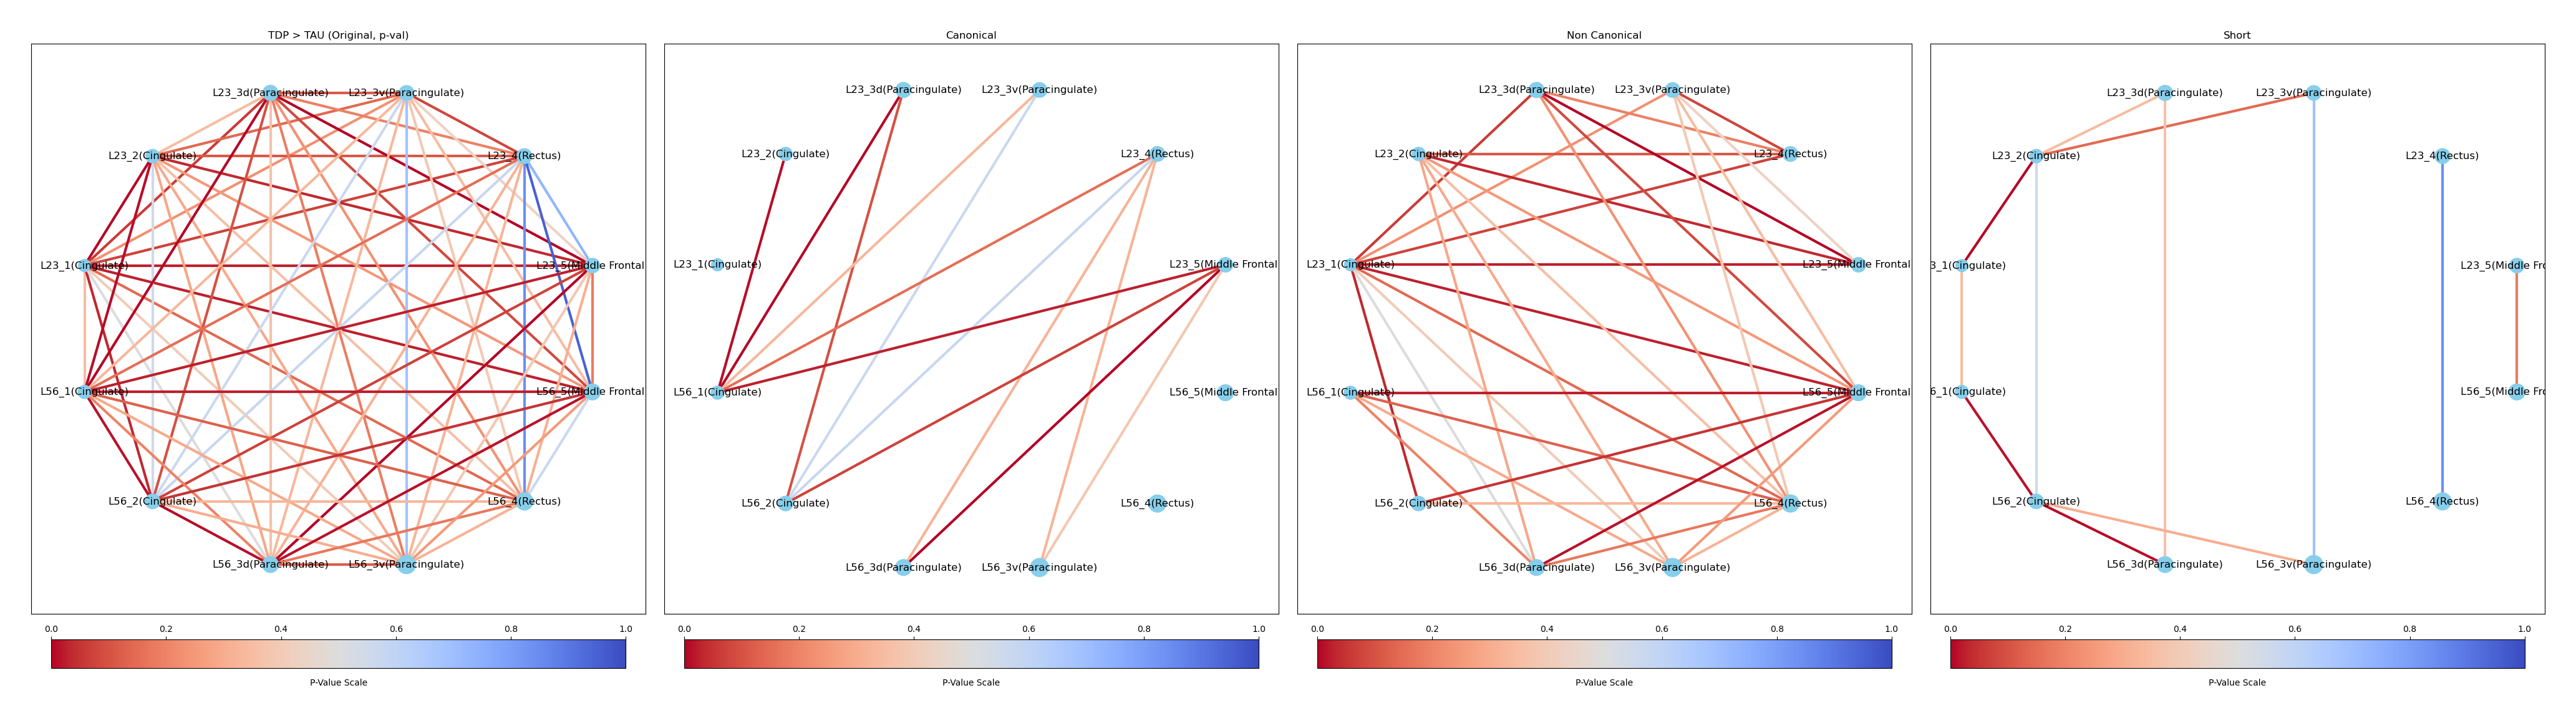

In [18]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, f'TDP > TAU ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > TAU ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()